In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 def Ratio_Matrix(S, D, alpha):
    RM = np.full((2*S - 1, 2*S - 1), 1, dtype = 'float64')
    for i in range(2*S - 1):
        if i - (S-1) > 0:
            r = alpha*(i - (S-1)) + D/2
            for j in range(2*S - 1):
                if (j - (S-1) >= - r) and (j - (S-1) <= r) :
                    RM[i][j] = (1 - 2/3*(D/2/(D/2 + alpha * (i - (S-1))))**2)
    return RM

def include_wakes(x, y, V_eff, RM, S):
    rm = RM[S-1-x: 2*S-1-x, S-1-y: 2*S-1-y]
    V_eff = np.multiply(V_eff, rm)
    return V_eff

def mark_territory(x, y, Land, TM):
    R = len(TM)//2
    S = len(Land)
    for i in range(max(-x, -R), min (S-x, R+1)):
        for j in range(max(-y, -R), min (S-y, R+1)):
            Land[x+i][y+j] *= TM[R+i][R+j]
    return Land

def Territory_Matrix(R):
    TM = np.full((2*R+1, 2*R+1), 1)
    for i in range(2*R+1):
        for j in range(2*R+1):
            if ((R - i)**2 + (R - j)**2)**0.5 <= R:
                TM[i][j] = 0
    return TM

In [ ]:
def windfarm(S, N, v_inf, D, n = 0, V_eff = None, Land = None, turbine_locs = None, TM = None, RM = None, flipped = False, alpha = 0.1):
    if n == 0:
        V_eff = np.full((S, S), v_inf, dtype = 'float64')
        Land = np.full((S, S), 1)
        TM = Territory_Matrix(2*D)
        RM = Ratio_Matrix(S, D, alpha)
        turbine_locs = list()
        
    if n == N:
        return turbine_locs, V_eff, Land
    
    max_index = np.argmax(np.multiply(Land, V_eff))
    x = max_index // S
    y = max_index % S
    Land = mark_territory(x, y, Land, TM)
    V_eff = include_wakes(x, y, V_eff, RM, S)
    
    if not flipped: 
        turbine_locs.append((x, y))
        V_eff, Land = np.fliplr(V_eff), np.fliplr(Land)
        flipped = True
    else: 
        turbine_locs.append((x, S - 1 - y))
        V_eff, Land = np.fliplr(V_eff), np.fliplr(Land)
        flipped = False
    
    return windfarm(S, N, v_inf, D, n+1, V_eff, Land, turbine_locs, TM, RM, flipped)

In [ ]:
#Parameters
N = 40
S = 3142
D = 100
v_inf = 1

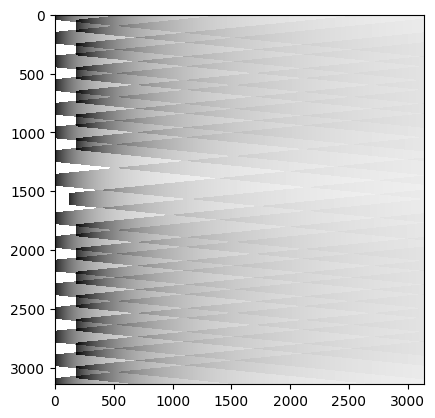

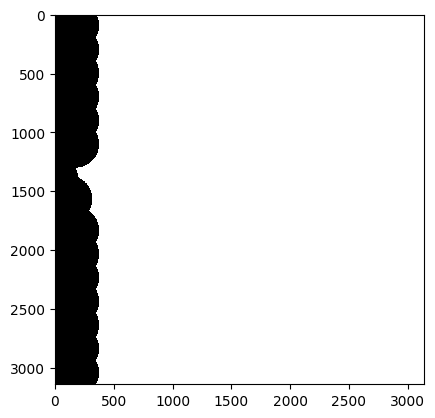

Coefficient: 30.0, Efficiency: 1.0


In [ ]:
#Display the configuration / velocity plot
turbine_locs, V_eff, Land = windfarm(S, N, v_inf, D)
plt.imshow(np.transpose(V_eff), cmap = 'gray', interpolation = 'nearest')
plt.show()

#Land represents the area where a new turbine can be placed (white region)
plt.imshow(np.transpose(Land), cmap = 'gray', interpolation = 'nearest')
plt.show()

#Calculate the coefficient to V_inf^3 and the efficiency
Coeff = 0
for x,y in turbine_locs:
    Coeff += V_eff[x][y]**3
print(f"Coefficient: {Coeff}, Efficiency: {Coeff/N}")

In [ ]:
print(turbine_locs)

[(0, 0), (0, 1999), (0, 201), (0, 1798), (0, 402), (0, 1597), (0, 603), (0, 1396), (0, 804), (0, 1195), (45, 999), (174, 1900), (174, 99), (174, 1699), (174, 300), (174, 1498), (174, 501), (174, 1297), (174, 702), (218, 1101), (218, 898), (1999, 1999), (1999, 0), (1509, 1999), (1509, 0), (1817, 1916), (1817, 83), (1683, 1699), (1683, 300), (1683, 1498), (1683, 501), (1677, 1297), (1677, 702), (1687, 1095), (1309, 1), (1309, 1998), (1999, 853), (1642, 900), (727, 999), (673, 1800), (673, 199), (673, 1599), (673, 400), (673, 1398), (673, 601), (673, 1197), (673, 802), (653, 1999), (653, 0), (528, 1019), (474, 219), (474, 1780), (474, 420), (474, 1579), (474, 621), (474, 1378), (474, 822), (454, 1979), (454, 20), (417, 1186), (1982, 420), (1982, 1579), (1982, 621), (1962, 1778), (1962, 221), (1906, 1385), (973, 319), (973, 1680), (973, 520), (973, 1479), (973, 721), (953, 1879), (953, 120), (983, 923), (1993, 1176)]


In [ ]:
def pso_initial(turbine_locs):
  turbine_locs_pso = []
  for x,y in turbine_locs:
    turbine_locs_pso.append(x)
    turbine_locs_pso.append(y)
  return turbine_locs_pso

turbine_locs_pso = pso_initial(turbine_locs)
print(turbine_locs_pso)

[0, 0, 0, 1999, 0, 201, 0, 1798, 0, 402, 0, 1597, 0, 603, 0, 1396, 0, 804, 0, 1195, 45, 999, 174, 1900, 174, 99, 174, 1699, 174, 300, 174, 1498, 174, 501, 174, 1297, 174, 702, 218, 1101, 218, 898, 1999, 1999, 1999, 0, 1509, 1999, 1509, 0, 1817, 1916, 1817, 83, 1683, 1699, 1683, 300, 1683, 1498, 1683, 501, 1677, 1297, 1677, 702, 1687, 1095, 1309, 1, 1309, 1998, 1999, 853, 1642, 900, 727, 999, 673, 1800, 673, 199, 673, 1599, 673, 400, 673, 1398, 673, 601, 673, 1197, 673, 802, 653, 1999, 653, 0, 528, 1019, 474, 219, 474, 1780, 474, 420, 474, 1579, 474, 621, 474, 1378, 474, 822, 454, 1979, 454, 20, 417, 1186, 1982, 420, 1982, 1579, 1982, 621, 1962, 1778, 1962, 221, 1906, 1385, 973, 319, 973, 1680, 973, 520, 973, 1479, 973, 721, 953, 1879, 953, 120, 983, 923, 1993, 1176]


In [ ]:
#Previous Code to Visualize the Velocity Plot (slower running time)
def superposition_V(turbine_locs, S, v_inf, D, alpha):
    turbine_locs.sort() #Sorting with priority given to x coordinate
    v_effs = [] #contains calculated effective velocities for each windmill
    wakes = [] #contains wake formation for each windmill
    
    V_eff = np.full((S, S), v_inf, dtype = 'float64')
    for n, (x, y) in enumerate(turbine_locs):

        wakes.append(wake_windmill(x,y, V_eff[x][y], S, D, alpha))
        
        v_effs.append(V_eff[x][y])
        V_eff = np.full((S, S), v_inf, dtype = 'float64')
        
        for n_pq in range(n+1):
            p, q = turbine_locs[n_pq]
            V_ijpq = wakes[n_pq]
            V_eff *= ((V_ijpq)/np.full((S, S), V_ijpq[p][q]))

    return v_effs, wakes, V_eff

def wake_windmill(p, q, v_t, S, D, alpha):
    #p and q is the location of that windmill
    V_eff = np.zeros((S,S))
    for x in range(S):
        # r = np.sqrt(D**2/(12*(1-(2/3*(D/2/(D/2 + alpha*x))**2))))
        r = alpha*(x - p) + D/2
        for y in range(S):
            if x <= p:
                V_eff[x][y] = v_t
            else:
                if (y >= (q - r)) and (y <= (q + r)) :
                    V_eff[x][y] = v_t * (1 - 2/3*(D/2/(D/2 + alpha * (x - p)))**2)
                else:
                    V_eff[x][y] = v_t
    return V_eff

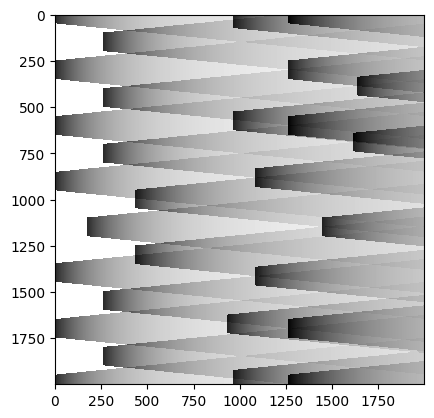

Coefficient: 24.757892141946776, Efficiency: 0.8252630713982259


In [ ]:
#Display velocity plot
v_effs, wakes, V_eff = superposition_V(turbine_locs, S, v_inf, D, 0.1)
plt.imshow(np.transpose(V_eff), cmap = 'gray', interpolation = 'nearest')
plt.show()

#Calculate the coefficient to V_inf^3 and the efficiency
Coeff = sum([i**3 for i in v_effs])
print(f"Coefficient: {Coeff}, Efficiency: {Coeff/N}")